<a href="https://colab.research.google.com/github/booth95/Wastemanagement/blob/main/dumpsiteclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# importing libraries

import numpy as np
import pandas as pd # for data processing
import os
import random

In [4]:
# importing libraries for data visualisation

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [5]:
# importing tensorflow for model creation and its dependancies

import tensorflow

#generate batches of tensor image data with real-time data augmentation

from keras.preprocessing.image import ImageDataGenerator

In [6]:
# for enabling inline plotting
%matplotlib inline

training = '/content/drive/MyDrive/Project/Train'
testing = '/content/drive/MyDrive/Project/Test'
validation = '/content/drive/MyDrive/Project/Validate'


In [17]:
# defining pre-processing transformation on raw images of training data

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.1,
        zoom_range = 0.1,
        horizontal_flip = True
        )


In [18]:
# defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator (rescale = 1./255)


In [19]:
# Generating training data

training_set = train_datagen.flow_from_directory(
        training,
        target_size = (220, 220),
        batch_size = 32,
        class_mode = 'categorical'
        )


Found 352 images belonging to 2 classes.


In [20]:
# Generating testing data

test_set = train_datagen.flow_from_directory(
        testing,
        target_size = (220, 220),
        batch_size = 32,
        class_mode = 'categorical'
        )

Found 50 images belonging to 2 classes.


In [21]:
valid_set = train_datagen.flow_from_directory(
        validation,
        target_size = (220, 220),
        batch_size = 32,
        class_mode = 'categorical'
        )

Found 50 images belonging to 2 classes.


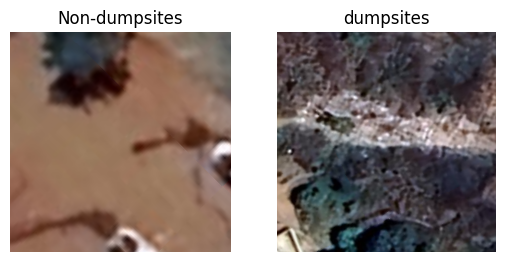

In [23]:
# Reading the image data
# function to plot any random image from dataset

def showImages(class_name):
        random_index = random.choice(list(range(1, 50)))
        folder_path = os.path.join(training, class_name)
        try:
            image_path = os.path.join(folder_path, str(random_index).zfill(2)+'.png')
            plt.imshow(mpimg.imread(image_path))
        except:
            image_path = os.path.join(folder_path, str(random_index).zfill(2) + '.png')
            plt.imshow(mpimg.imread(image_path))
        plt.title(class_name)
        plt.axis(False)

plt.figure(figsize = (20, 20))
for labels,number in training_set.class_indices.items():
    plt.subplot(6,6,number+1)
    showImages(labels)

In [24]:
# printing class labels for each face
test_set.class_indices

{'Non-dumpsites': 0, 'dumpsites': 1}

In [25]:
#creating a list of sites

TrainClasses = training_set.class_indices
ResultMap={}
for siteValue,siteName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[siteValue] = siteName

import pickle
with open(R'/content/drive/MyDrive/Project/ResultsMap.pkl', 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

    print('mapping of Face and its ID', ResultMap)


mapping of Face and its ID {0: 'Non-dumpsites', 1: 'dumpsites'}


In [26]:
# number of neurons of the output layer is the same as the number of faces

OutputNeurons = len(ResultMap)
print('\n The number of output neurons: ', OutputNeurons)



 The number of output neurons:  2


In [11]:
# creating the CNN model
#!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


In [12]:
# initializing the CNN

classifier = Sequential()

# first layer of CNN
classifier.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                      input_shape=(220, 220, 3), activation = 'relu'))

# add pooling layer

classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), input_shape=(220, 220, 3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2, 2)))

# flattening

classifier.add(Flatten())

#fully connected network
OutputNeurons =2
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(OutputNeurons, activation = 'softmax'))

# compiling CNN

classifier.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ["accuracy"])

classifier.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79c0b5889690>>

In [50]:
# importing a model
# measuring the time taken by the model

import time

StartTime = time.time()

In [51]:
# start model training

model_history = classifier.fit(
        training_set,
        steps_per_epoch = len(training_set),
        epochs = 20,
        validation_data = valid_set,
        validation_steps = len(valid_set),
        verbose = 1
        )
EndTime = time.time()
print("######### Total Time Taken:", round((EndTime-StartTime)/60), "Minutes ##########")


Epoch 1/20
11/11 [==============================] - 123s 11s/step - loss: 5.1673 - accuracy: 0.5256 - val_loss: 0.7162 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - 66s 6s/step - loss: 1.4182 - accuracy: 0.5057 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 3/20
11/11 [==============================] - 66s 6s/step - loss: 0.7151 - accuracy: 0.5568 - val_loss: 0.6689 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 68s 6s/step - loss: 0.6820 - accuracy: 0.5227 - val_loss: 0.6694 - val_accuracy: 0.5000
Epoch 5/20
11/11 [==============================] - 66s 6s/step - loss: 0.7023 - accuracy: 0.6051 - val_loss: 1.8045 - val_accuracy: 0.5000
Epoch 6/20
11/11 [==============================] - 66s 6s/step - loss: 0.7863 - accuracy: 0.5483 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 7/20
11/11 [==============================] - 65s 6s/step - loss: 0.6878 - accuracy: 0.5795 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 8/20
11/11 [

In [52]:
# model history

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


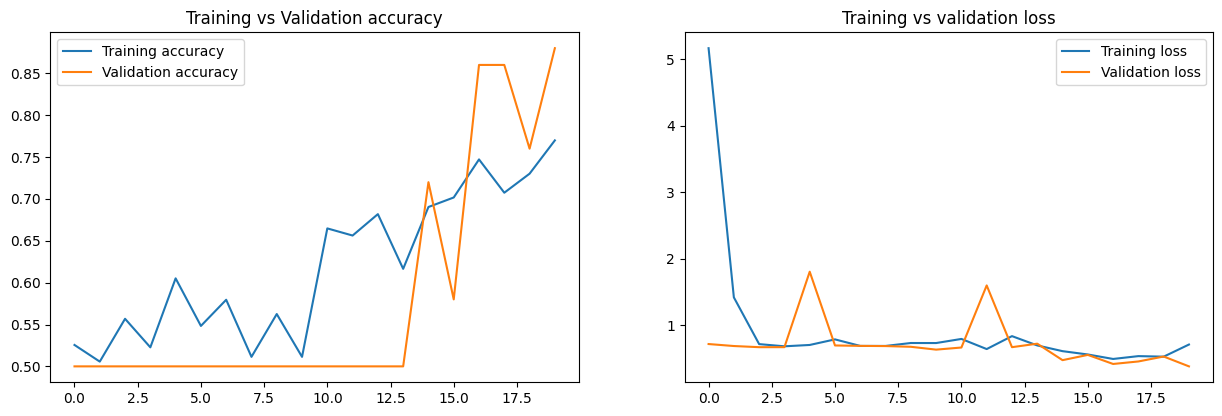

In [53]:
#plotting

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label = 'Validation accuracy')
plt.legend()
plt.title('Training vs Validation accuracy')

plt.subplot(2,2,2)
plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validation loss')
plt.legend()
plt.title('Training vs validation loss')

plt.show()


In [54]:
# saving the model
classifier.save('/content/drive/MyDrive/Project/classifier.pkl')


In [8]:
#testing the model

from tensorflow.keras.utils import load_img, img_to_array


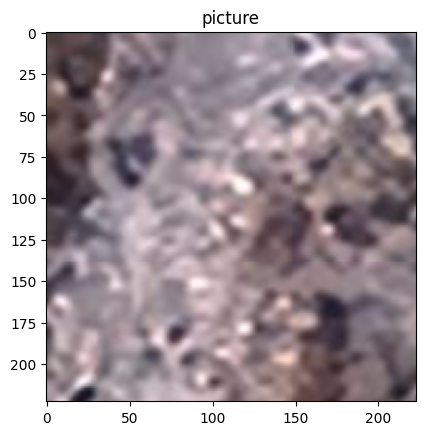

############################################################
Prediction is:  dumpsites


In [106]:
# test positive result
testImage = "//content/drive/MyDrive/Project/Test/dumpsites/25.png"
test_image = load_img(testImage, target_size = (220, 220))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image, verbose = 0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()
print('######' * 10)
print('Prediction is: ',ResultMap[np.argmax(result)])

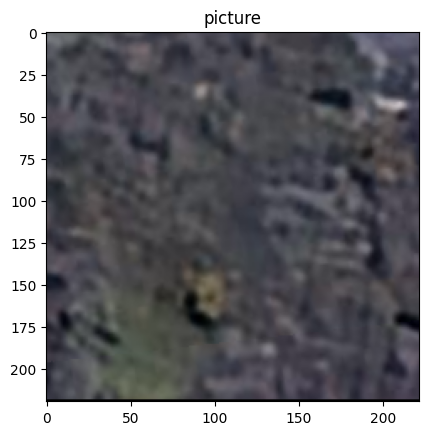

############################################################
Prediction is:  Non-dumpsites


In [82]:
# test negative result
testImage = "/content/drive/MyDrive/Project/Test/Non-dumpsites/25.png"
test_image = load_img(testImage, target_size = (220, 220))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image, verbose = 0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('######' * 10)
print('Prediction is: ' ,ResultMap[np.argmax(result)])

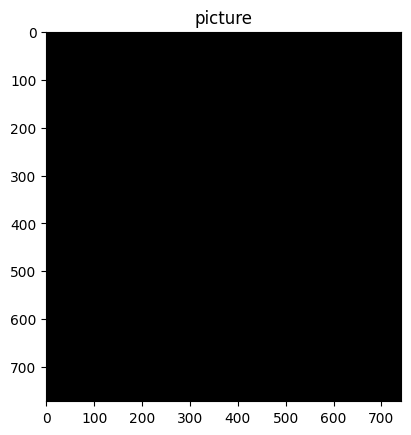

############################################################
Prediction is:  Non-dumpsites


In [29]:
# testing the result of an image from google earth engine
testImage = "/content/drive/MyDrive/export/image (1).png"
test_image = load_img(testImage, target_size = (220, 220))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image, verbose = 0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()
print('######' * 10)
print('Prediction is: ',ResultMap[np.argmax(result)])